Iowa alcohol study.  Using data from 2015 and the first quarter of 2016 I made predictions of the alcohol sales in Iowa for 2016.  I used a linear regression model with cross validation from sklearn.  I used both Ridge and Lasso regression methods and the both improved the model. 

The data set from Iowa is large so I used the set that was composed of 10% of the full set.   I made my final projections using the full set.  

Lessons learned from this exercise...  don't get obsessed with a small number of nulls in a large data set.  I spent too many hours writing code to try and have the computer correct some of its errors.   It was more an excise in python for me.  Since I am still a novice at python that was a good exercise.  Not long after I got my code to work, I learned about a 'map' function that would do what I had written much faster.   The time I spent there could have been spent on other aspects.   It is probably best to build a simple model early on with a simplified data set and then decorate it as you have time.   

I was interesting to see how much difference there was in using the full data set after working with the 10% sampling set.   With the small data set my projection of sales increase was about 2.2%  With the large set, it was about 4% (rough average of Lasso and Ridge). Initially, I would have thought there wouldn't have been that much of a difference with a 10% sampling.  

I chose to do the first approach. 

My model of using counties as dummy variables was a fairly simple one.  The scores came out nicely and the projections seemed to be well within reason.  The number of times I have heard in class about using simpler models has had an effect.  

Things I enjoyed about this project. There were severeal highs and (very) lows during this. One of them, I referred to earlier about being able to write some code that made the computer use what it knew to correct some nulls.  The fact that I got that to work was satisfying. Another high point was where I had generated a sum of one of the sales column (for each store).   What was frustrating was that even though the info was printed out in front of me, I couldn't access it very easily.  After walking away from it a few hours later it came to mind that what I was looking at looked alot like a dictionary so I tried a 'to_dict" on it and, thankfully, it worked and the data I wanted was finally easily usable.   I was also nice when, after spending unknown amounts of hours generating the data, I put it into the code for the modeling software and it gave me an answer that wasn't nutty.  

Things I didn't like. One of the odder moments was when I had made a data frame what was 1400 by 99 (# stores and the variables).  I wanted to pull out one of the columns from that so it should be 1400,1... it came out with one more row listed...????   1401!!!??   I had several people look at it including Sam.  No one could determine why.  I went back to the start of my code and re-ran it.  It didn't appear again - thank God!.   

In [636]:
# 1  read in the data with pandas

import pandas as pd
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4

## Load the data into a DataFrame  using the 10 percent file 
#df = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv")
df = pd.read_csv("Iowa_Liquor_Sales_reduced.csv")
df.head()
#df.shape
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

/Users/user/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [637]:
#2 rename columns with no spaces
df.columns=['date','store_num','city','zip','county_num','county','category','cat_name','vendor_num','item_num','item_descrip','bottle_vol_ml','state_bottle_cost','state_bottle_retail','bottles_sold','sales','volume_sold_l','volume_sold_g']

In [638]:
#3  explore data analysis

def eda(dataframe):
   print dataframe.dtypes
   print dataframe.describe()
#   print dataframe.describe(include='all')
   print dataframe.isnull().sum()
   print dataframe.index
   print dataframe.head()
   print dataframe.tail()
   print dataframe.corr(method='pearson', min_periods=1)
print eda(df)

date                    object
store_num                int64
city                    object
zip                     object
county_num             float64
county                  object
category               float64
cat_name                object
vendor_num               int64
item_num                 int64
item_descrip            object
bottle_vol_ml            int64
state_bottle_cost       object
state_bottle_retail     object
bottles_sold             int64
sales                   object
volume_sold_l          float64
volume_sold_g          float64
dtype: object
          store_num    county_num      category    vendor_num      item_num  \
count  2.709552e+06  2.698639e+06  2.708773e+06  2.709552e+06  2.709552e+06   
mean   3.589071e+03  5.726086e+01  1.043826e+06  2.563901e+02  4.601624e+04   
std    9.491083e+02  2.732565e+01  5.003493e+04  1.408757e+02  5.311268e+04   
min    2.106000e+03  1.000000e+00  1.011100e+06  1.000000e+01  1.460000e+02   
25%    2.604000e+03           NaN

# Clean up the nulls as best as possible and other errors and aspects like dollar signs.  

In [396]:
#4  Find errant zip code # and replace it.  This line of code tells me the errant code string '712-2'
#df.zip = df.zip.astype(int)   #  if you run this you'll get an error that tells you that the string '712-2' is 
# in the zip code column and is bad.  

In [639]:
# 4 find index of errant zip code...
list(df["zip"]).index('712-2')

28205

In [ ]:
# 5    51529 is zip code for index 114  Dunlap IA

In [640]:
#6 replace the errant zip code
df.loc[28205,'zip'] = 51529       

In [641]:
#7 remove $s from sales columns  
df['sales'] = df['sales'].str.replace('$', '')

In [642]:
# 8 remove , and float.  sales column

df['sales'] = df['sales'].str.replace(',', '').astype(float)

In [643]:
#9 remove $ and float in the bottle cost and retail columns 

df['state_bottle_cost'] = df['state_bottle_cost'].str.replace('$', '').astype(float)
df['state_bottle_retail'] = df['state_bottle_retail'].str.replace('$', '').astype(float)

In [644]:
# 10 
#create data frame for elmination of nulls in county column using city information
testframe = pd.DataFrame(df, columns=['city','county'])
testframe.head(2)
#testframe.shape

,city,county
0,DAVENPORT,Scott
1,DAVENPORT,Scott


In [645]:
#11
# drop the 1077 nulls is the new data frame   (10913 for the large data set)

dropped_na_rows = testframe.dropna(axis=0)
dropped_na_rows.shape

(2698639, 2)

In [646]:
#12 
#  eliminate the duplicates in the new data frame 
dropped_na_rows = dropped_na_rows.drop_duplicates()
dropped_na_rows.shape

(394, 2)

In [541]:
counties = dropped_na_rows['county']
counties = counties.drop_duplicates()

In [ ]:
# 13
# use the  city list to create a  dictionary of counties with the city as key
clean_ccdict=dict(zip(dropped_na_rows['city'], dropped_na_rows['county']))

Below is the code I wrote to step through the data series 'county' to replace the nulls with
the correct county name based on the city associated with that entry (row).  Spent too 
much time writing and trouble shooting this, but I own it.  It does take time to run and the 'map' function is much much faster.  

In [ ]:
 #  14 
# replace zeros in 'county' with the proper name

#d = len(df['county'])
#print d
#for i in range(0,d):
#    f = df.loc[i,'county']
#    print f
#    if f != 0:
#        continue
#    else:
#        if df.loc[i,'city'] not in clean_ccdict:
#            continue
#        else:
#            county = clean_ccdict[df.loc[i,'city']]
#            df.loc[i,'county'] = county

In [648]:
#14
# use map to correct the errors in the county with data from city 

df['county'] = df['city'].map(clean_ccdict)

In [649]:
#15  see how many of the 1077 are fixed
df.isnull().sum()

date                       0
store_num                  0
city                       0
zip                        0
county_num             10913
county                   178
category                 779
cat_name                6109
vendor_num                 0
item_num                   0
item_descrip               0
bottle_vol_ml              0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sales                      0
volume_sold_l              0
volume_sold_g              0
dtype: int64

In [ ]:
#All but 12 are eliminated (for the 10% data frame  do the same for county_num 

#(large data set all but 178 are eliminated

In [650]:
# 16
# create frame for testing of elmination of nulls in county_num
cctestframe = pd.DataFrame(df, columns=['county','county_num'])
cctestframe.head(3)
cctestframe.shape

(2709552, 2)

In [651]:
# 17 
# drop the  nulls for the county - county_num  dictionary

ccdropped_na_rows = cctestframe.dropna(axis=0)
ccdropped_na_rows.shape

(2698639, 2)

In [652]:
# 18
# use the clean list to create a clean dictionary of county numbers with the county as key
ccclean_ccdict=dict(zip(ccdropped_na_rows['county'], ccdropped_na_rows['county_num']))

In [653]:
#19
# use the dictionary to clean the nulls with map
df['county_num'] = df["county"].map(ccclean_ccdict)

In [654]:
# 20 
df.isnull().sum()

date                      0
store_num                 0
city                      0
zip                       0
county_num              178
county                  178
category                779
cat_name               6109
vendor_num                0
item_num                  0
item_descrip              0
bottle_vol_ml             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sales                     0
volume_sold_l             0
volume_sold_g             0
dtype: int64

In [ ]:
#All but 12 are eliminated. (small data set)   (178 for the large data set.)
#I'll drop them and the nulls in cat_name and category. 

In [655]:
#21  
# drop the nulss in county and county_num and  cat_names and category nulls.  

df.dropna(inplace = True)

In [656]:
#22   split out the month and year and create month and year columns 

x = pd.to_datetime(df['date'])
df['year'] = x.dt.year
df['month'] = x.dt.month

In [657]:
# 23 redefine sales to correct errors in sales calculation

df['sales'] = df['bottles_sold'] * df['state_bottle_retail'] 

In [658]:
df.head(5)

,date,store_num,city,zip,county_num,county,category,cat_name,vendor_num,item_num,item_descrip,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold_l,volume_sold_g,year,month
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19,2016,3
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53,2016,3
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77,2016,3
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54,2016,3
4,03/31/2016,5240,WEST BRANCH,52358,16.0,Cedar,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19,2016,3


# Start assembling data frames for use as "X" and 'y' for model building.  

In [659]:
# 24 construct county dicitonary using store # and county

countytestframe = pd.DataFrame(df, columns=['store_num','county'])

In [660]:
#25 drop the dups

countytestframe = countytestframe.drop_duplicates()
countytestframe.shape

(1400, 2)

In [661]:
#26  create store number - county dictionary for creating a new data frame for analysis of the data. 

store_num_county_dict=dict(zip(countytestframe['store_num'], countytestframe['county']))

In [662]:

# 27 
# create iowa_2015 (and iowa_2016) using the store_num_county_dictionary with the store numbers being the index for the data frame

iowa_2015 = pd.DataFrame.from_dict(store_num_county_dict, orient='index')
iowa_2016 = pd.DataFrame.from_dict(store_num_county_dict, orient='index')
#iowa_2015.head(2)
iowa_2016.head(2)

,0
9001,Johnson
9002,Scott


In [663]:
df.head()

,date,store_num,city,zip,county_num,county,category,cat_name,vendor_num,item_num,item_descrip,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold_l,volume_sold_g,year,month
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19,2016,3
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53,2016,3
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77,2016,3
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.6,2.54,2016,3
4,03/31/2016,5240,WEST BRANCH,52358,16.0,Cedar,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.5,1.19,2016,3


In [664]:
# 28
# rename the '0' column
iowa_2015.columns = ['county']
iowa_2016.columns = ['county']
iowa_2016.head()


,county
9001,Johnson
9002,Scott
9010,Warren
9013,Warren
9018,Dubuque


In [665]:
len(iowa_2015)

1400

In [666]:
# 29
#create a list of zeros to put into iowa_2015['Q1_2015]   and create the Q1_2015 column wiht those zeros.

listofzeros = [0] * 1400
#listofzeros
iowa_2015['Q1_2015'] = listofzeros
#iowa_2015['Q2_2015'] = listofzeros
#iowa_2015['Q3_2015'] = listofzeros
#iowa_2015['Q4_2015'] = listofzeros
iowa_2015['2015_total_profit'] = listofzeros
iowa_2016['Q1_2016'] = listofzeros
#iowa_2015['county'] = listofzeros

iowa_2015.head()

,county,Q1_2015,2015_total_profit
9001,Johnson,0,0
9002,Scott,0,0
9010,Warren,0,0
9013,Warren,0,0
9018,Dubuque,0,0


In [667]:
iowa_2016.head()

,county,Q1_2016
9001,Johnson,0
9002,Scott,0
9010,Warren,0
9013,Warren,0
9018,Dubuque,0


In [668]:
#30
# create list of store numbers  

store_num_list = df['store_num'].tolist()
store_num_list = set(store_num_list)
len(store_num_list)

1400

In [503]:
# create a list of iowa counties and alphabetize them 
county_list = iowa_2015['county'].tolist()
county_list.sort()
county_list 

my_set = set(county_list)
my_list = list(my_set)

my_list.sort()
my_list

#first_list = [1,2,3,4]
#my_set=set(first_list)
#my_list = list(my_set)
#list(set(t))
#a = pd.Series(data=[1,2,3])
#b = pd.Series(data=[4,5,6])
#a.name = 'a'
#pd.DataFrame(zip(a,b), columns=[a.name, b.name])

['Adair',
 'Adams',
 'Allamakee',
 'Appanoose',
 'Audubon',
 'Benton',
 'Black Hawk',
 'Boone',
 'Bremer',
 'Buchanan',
 'Buena Vista',
 'Butler',
 'Calhoun',
 'Carroll',
 'Cass',
 'Cedar',
 'Cerro Gordo',
 'Cherokee',
 'Chickasaw',
 'Clarke',
 'Clay',
 'Clayton',
 'Clinton',
 'Crawford',
 'Dallas',
 'Davis',
 'Decatur',
 'Delaware',
 'Des Moines',
 'Dickinson',
 'Dubuque',
 'Emmet',
 'Fayette',
 'Floyd',
 'Franklin',
 'Fremont',
 'Greene',
 'Grundy',
 'Guthrie',
 'Hamilton',
 'Hancock',
 'Hardin',
 'Harrison',
 'Henry',
 'Howard',
 'Humboldt',
 'Ida',
 'Iowa',
 'Jackson',
 'Jasper',
 'Jefferson',
 'Johnson',
 'Jones',
 'Keokuk',
 'Kossuth',
 'Lee',
 'Linn',
 'Louisa',
 'Lucas',
 'Lyon',
 'Madison',
 'Mahaska',
 'Marion',
 'Marshall',
 'Mills',
 'Mitchell',
 'Monona',
 'Monroe',
 'Montgomery',
 'Muscatine',
 "O'Brien",
 'Osceola',
 'Page',
 'Palo Alto',
 'Plymouth',
 'Pocahontas',
 'Polk',
 'Pottawattamie',
 'Poweshiek',
 'Ringgold',
 'Sac',
 'Scott',
 'Shelby',
 'Sioux',
 'Story',
 'T

In [669]:
# 31

# create the data frames for the quarters of 2015    

Q1_2015 = df[((df['month'] == 1)|(df['month'] == 2)|(df['month'] == 3)) & (df['year'] == 2015)]
Q2_2015 = df[((df['month'] == 4)|(df['month'] == 5)|(df['month'] == 6)) & (df['year'] == 2015)]
Q3_2015 = df[((df['month'] == 7)|(df['month'] == 8)|(df['month'] == 9)) & (df['year'] == 2015)]
Q4_2015 = df[((df['month'] == 10)|(df['month'] == 11)|(df['month'] == 12)) & (df['year'] == 2015)]
Total_2015 = df[df['year'] == 2015]
Q1_2015.head(2)

,date,store_num,city,zip,county_num,county,category,cat_name,vendor_num,item_num,item_descrip,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold_l,volume_sold_g,year,month
2212926,03/31/2015,2508,CEDAR RAPIDS,52405,57.0,Linn,1031080.0,VODKA 80 PROOF,260,37426,Popov Vodka 80 Prf Traveler,750,4.50,6.75,12,81.00,9.00,2.38,2015,3
2212927,03/31/2015,3942,TOLEDO,52342,86.0,Tama,1022100.0,TEQUILA,65,88540,Hornitos Lime Shot,750,13.64,20.46,3,61.38,2.25,0.59,2015,3


In [670]:
#32 create data frame for the 1st quarter of 2016

Q1_2016 = df[((df['month'] == 1)|(df['month'] == 2)|(df['month'] == 3)) & (df['year'] == 2016)]
Q1_2016.head(1)

,date,store_num,city,zip,county_num,county,category,cat_name,vendor_num,item_num,item_descrip,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sales,volume_sold_l,volume_sold_g,year,month
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19,2016,3


In [671]:
#33 dictionary fof 2016 for summing sales for each store  

Q1_2016_dict = Q1_2016.groupby('store_num').sales.sum().to_dict()

In [672]:
#34  create a list of sales by quarter for 2015.  
quarterlist2015= []
#Q3_2015['sales'].sum()
#Q2_2015.head(2)

#Q2_2015.head()
quarterlist2015.append(Q1_2015['sales'].sum()/1000000)
quarterlist2015.append(Q2_2015['sales'].sum()/1000000)
quarterlist2015.append(Q3_2015['sales'].sum()/1000000)
quarterlist2015.append(Q4_2015['sales'].sum()/1000000)

print quarterlist2015

[62.96131698002593, 72.34904149003236, 68.59421117003636, 80.10077482003047]


In [673]:
# 35
# create the dictionaries with the sum Q1_2015 sales numbers for all of the store numbers. keyed on the store number  woo-hoo!  

Q1_2015_dict = Q1_2015.groupby('store_num').sales.sum().to_dict()
#Q2_2015_dict = Q2_2015.groupby('store_num').sales.sum().to_dict()
#Q3_2015_dict = Q3_2015.groupby('store_num').sales.sum().to_dict()
#Q4_2015_dict = Q4_2015.groupby('store_num').sales.sum().to_dict()
Total_2015_dict = Total_2015.groupby('store_num').sales.sum().to_dict()

In [674]:
#36
# use Q1_2015_dict to replace zeros in iowa_2015 with the first quarter numbers  from Q1_2015

for i in store_num_list:
    iowa_2015.loc[i,'store_num'] = i
    if i in Q1_2015_dict:
        iowa_2015.loc[i,'Q1_2015'] = Q1_2015_dict[i]
#    if i in Q2_2015_dict:
#        iowa_2015.loc[i,'Q2_2015'] = Q2_2015_dict[i]
#    if i in Q3_2015_dict:
#        iowa_2015.loc[i,'Q3_2015'] = Q3_2015_dict[i]
#    if i in Q4_2015_dict:
#        iowa_2015.loc[i,'Q4_2015'] = Q4_2015_dict[i]
    if i in Total_2015_dict:
        iowa_2015.loc[i,'2015_total_profit'] = Total_2015_dict[i]
    if i in Q1_2016_dict:
        iowa_2016.loc[i,'Q1_2016'] = Q1_2016_dict[i]

In [675]:
iowa_2015.head()

,county,Q1_2015,2015_total_profit,store_num
9001,Johnson,42762.24,191820.12,9001.0
9002,Scott,44636.28,327676.62,9002.0
9010,Warren,11707.62,26209.38,9010.0
9013,Warren,825.60,30957.66,9013.0
9018,Dubuque,0.00,21825.00,9018.0


In [676]:
iowa_2016.head()

,county,Q1_2016
9001,Johnson,22355.76
9002,Scott,28283.60
9010,Warren,697.44
9013,Warren,6191.34
9018,Dubuque,0.00


In [677]:
iowa_2015.shape

(1400, 4)

In [678]:
#37 eliminate stores with zero sales in a quarter and less than $300 in sales.  (Note: the name of the column is 2015_total_profit
#which refers to earlier when I was using profits instead of sales I changed to using  sales but kept the label in my code.  )

goodiowastores = iowa_2015[(iowa_2015['Q1_2015'] != 0)  &  (iowa_2015['2015_total_profit'] > 300)]

In [ ]:
#38 eliminate stores with a zero quarter of sales 

goodiowa2016 = iowa_2016[(iowa_2016['Q1_2016'] != 0) ]
goodiowa2016.head()

# add dummy variables to the 2015 and 2016 data frames

In [680]:
#39 create dummy variables for 2016 (counties eliminate one county )

dummies_minus_one = pd.get_dummies(goodiowa2016['county'], drop_first=True)
goodiowa2016 = pd.concat([goodiowa2016, dummies_minus_one], axis=1)
goodiowa2016.drop('county', axis=1, inplace=True)
goodiowa2016.head()

,Q1_2016,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,Buena Vista,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,22355.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,28283.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,697.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,6191.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,651.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [681]:
iowa_2015['2015_total_profit'].sum()

284005344.46000063

In [682]:
iowa_2015['Q1_2015'].sum()

62961316.98

In [683]:
goodiowastores['Q1_2015'].sum()

62961316.98

In [684]:
goodiowastores.head()

,county,Q1_2015,2015_total_profit,store_num
9001,Johnson,42762.24,191820.12,9001.0
9002,Scott,44636.28,327676.62,9002.0
9010,Warren,11707.62,26209.38,9010.0
9013,Warren,825.60,30957.66,9013.0
9022,Scott,3992.10,3992.10,9022.0


In [339]:
#Q1_2015.groupby('county').sales.sum()

In [686]:
goodiowastores.shape

(1283, 4)

In [687]:
#41 create dummies for 2015 (for creating 'X')
dummies_minus_one = pd.get_dummies(goodiowastores['county'], drop_first=True)
goodiowastores = pd.concat([goodiowastores, dummies_minus_one], axis=1)
goodiowastores.drop('county', axis=1, inplace=True)

#dummies_minus_one = pd.get_dummies(df[['native-country', 'race', 'marital-status', 'occupation','workclass', 'relationship', 'sex', 'education']], drop_first=True)
#df = pd.concat([df, dummies_minus_one], axis=1)
#df.drop(['native-country', 'race', 'marital-status', 'occupation','workclass', 'relationship', 'sex', 'education', 'salary', 'fnlwgt', 'education-num'], axis=1, inplace=True)



In [688]:
goodiowastores.head()

,Q1_2015,2015_total_profit,store_num,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,42762.24,191820.12,9001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,44636.28,327676.62,9002.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,11707.62,26209.38,9010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,825.60,30957.66,9013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,3992.10,3992.10,9022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [689]:
#43  eliminate 'store_num'   
goodiowastores.drop('store_num', axis=1, inplace=True)

In [690]:
goodiowastores.head()

,Q1_2015,2015_total_profit,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,42762.24,191820.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,44636.28,327676.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,11707.62,26209.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,825.60,30957.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,3992.10,3992.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [439]:
goodiowastores.head()

,Q1_2015,2015_total_profit,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,2341.08,28208.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,4865.16,37700.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,3861.60,5757.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2106,39287.29,146038.70,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2113,2833.25,9310.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [691]:
goodiowastores.shape

(1283, 99)

# Create 'y' and 'X' s for 2016 and 2015

In [692]:
# 43.  create the 'y'   

y = goodiowastores['2015_total_profit']
y.head()

9001    191820.12
9002    327676.62
9010     26209.38
9013     30957.66
9022      3992.10
Name: 2015_total_profit, dtype: float64

In [693]:
y.shape

(1283,)

In [694]:
y.sum()

278023997.34000075

In [695]:
goodiowastores.head()

,Q1_2015,2015_total_profit,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,42762.24,191820.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,44636.28,327676.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,11707.62,26209.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,825.60,30957.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,3992.10,3992.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [696]:
# 44  eliminate the raget column

goodiowastores.drop('2015_total_profit', axis=1, inplace=True)

In [697]:
goodiowastores.head()

,Q1_2015,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,Buena Vista,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,42762.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,44636.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,11707.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,825.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,3992.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [698]:
goodiowastores.shape

(1283, 98)

In [699]:
goodiowastores['Q1_2015'].shape

(1283,)

In [700]:
# 45    CReate X our variable 

X = goodiowastores
X.shape

(1283, 98)

In [701]:
X.head()

,Q1_2015,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,Buena Vista,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,42762.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,44636.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,11707.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,825.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,3992.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [702]:
goodiowa2016.head()

,Q1_2016,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,Buena Vista,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,22355.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,28283.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,697.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,6191.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,651.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [593]:
goodiowa2016.head()

,Q1_2016,Adams,Allamakee,Appanoose,Audubon,Benton,Black Hawk,Boone,Bremer,Buchanan,...,Wapello,Warren,Washington,Wayne,Webster,Winnebago,Winneshiek,Woodbury,Worth,Wright
9001,708.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9002,1382.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9010,177.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9013,361.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9023,633.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [703]:
#46 Create X for making 2016 preditions  

X_2016 = goodiowa2016

In [721]:
#  projection for 2016 using the dummy variable set (ran this after running the code for 2015)
# ran it for L1 and for L2.
# I summed the y_pred to get the projections for 2016.  

#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# build a linear regression model
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()
#linreg.fit(X_train, y_train)

# examine the coefficients
# print linreg.coef_

# make predictions
y_pred = linreg.predict(X_2016)

# calculate RMSE
#from sklearn import metrics
#print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print metrics.r2_score(y_test, y_pred)

print y_pred.sum()

291464760.886


In [705]:
#47 put X and y (with dummy variables to build the model with 2015 input )

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# examine the coefficients
# print linreg.coef_

# make predictions
y_pred = linreg.predict(X_test)

# calculate RMSE
from sklearn import metrics
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print metrics.r2_score(y_test, y_pred)

123718.271738
0.979243999626


In [706]:
#48 see if model can be improved using Ridge regression print out mean squared error start with alpha = 0

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

123718.271738


In [723]:
#49 use Ridge with alpha = .1  (it did improve)

from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print metrics.r2_score(y_test, y_pred)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.990705512468
82789.3998272


In [708]:
#50 use Lasso to see how well it works. alpha = 100

from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=100, normalize=True)
lassoreg.fit(X_train, y_train)
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print metrics.r2_score(y_test, y_pred)
print y_pred.sum()
print y_test.sum()

117217.650737
0.981367891403
102277403.12
97327652.2


In [709]:
#51  Lasso with alpha = 100 for prediction of 2016

from sklearn.linear_model import Lasso
#lassoreg = Lasso(alpha=100, normalize=True)
#lassoreg.fit(X_train, y_train)
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_2016)
#print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#print metrics.r2_score(y_test, y_pred)
print y_pred.sum()
#print y_test.sum()

290964097.393


In [724]:
# use Ridge with alpha = .1  for 2016 prediction

from sklearn.linear_model import Ridge
#ridgereg = Ridge(alpha=.1, normalize=True)
#ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_2016)
#print metrics.r2_score(y_test, y_pred)
#print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print y_pred.sum()

287382841.913


In [710]:
x = Q1_2015.groupby('county').sales.sum()

### create some visuals.

In [711]:
# Create a list of counties

counties = dropped_na_rows['county']
counties = counties.drop_duplicates()
counties.sort_values(inplace=True)
counties.head()


#Q1salesvCounty

18524        Adair
19068        Adams
7386     Allamakee
7087     Appanoose
31989      Audubon
Name: county, dtype: object

In [712]:
# Sales list for plotting with the counties.

Q1_county_sales_dict = Q1_2015.groupby('county').sales.sum().to_dict()

In [713]:
# create data frame
Q1_county_sales_dict

rrr = pd.DataFrame(Q1_county_sales_dict.items(),columns=['county', 'Q1_sales'])
rrr 
rrr.sort('county',inplace=True)
rrr.reset_index(inplace=True)
rrr.head()
#pd.DataFrame(d.items(), columns=['Date', 'DateValue'])

/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,county,Q1_sales
0,11,Adair,103556.31
1,7,Allamakee,155988.96
2,94,Appanoose,151755.48
3,90,Audubon,39274.46
4,87,Benton,185406.66


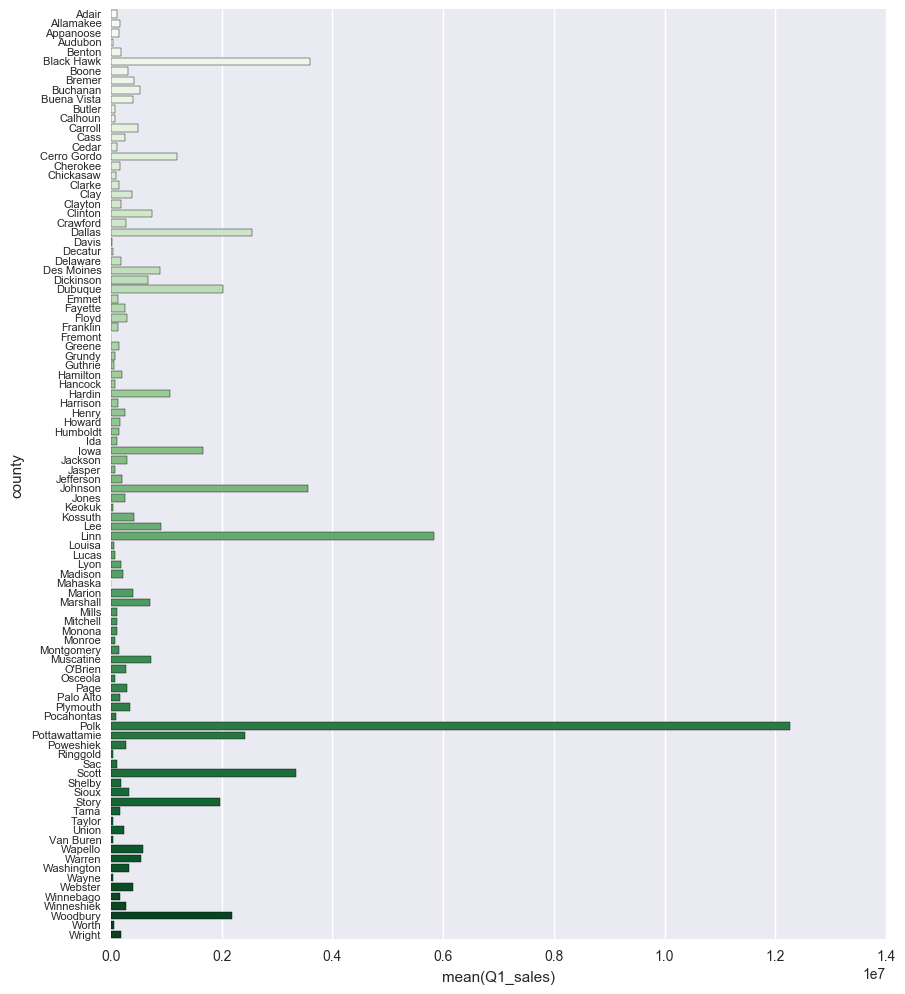

In [714]:
# plot the counties with the sales

import matplotlib.pyplot as plt
#ax = rrr[['county','Q1_sales']].plot(kind='bar', title ="2015 Q1_sales", figsize=(15, 10), legend=True, fontsize=12)
#ax.set_xlabel("County", fontsize=12)
#ax.set_ylabel("2015 Q1 sales", fontsize=12)
#plt.show()
plt.figure(figsize=(10,12))
sns.barplot(y='county', x="Q1_sales", data=rrr, label='county', palette='Greens')
plt.yticks(size=8)
plt.savefig('county sales 2015 (large data set.jpg')
plt.show()

In [715]:
# create list of quarter numbers
Q1234=[]
Q1234.append(1)
Q1234.append(2)
Q1234.append(3)
Q1234.append(4)

In [613]:
Q1234

[1, 2, 3, 4]

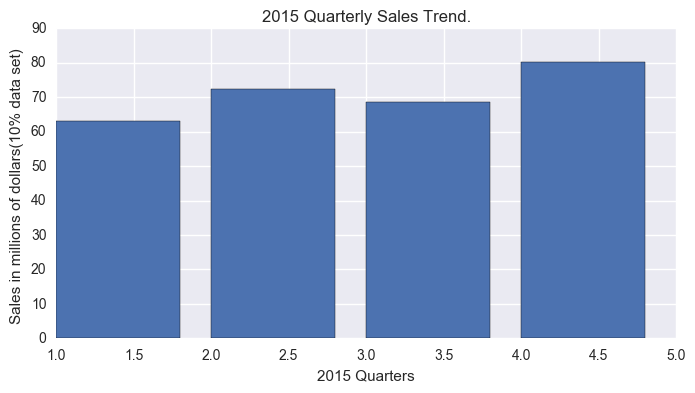

In [716]:
# create plot of 2015 quarterly sales

plt.bar(Q1234,quarterlist2015)
plt.xlabel("2015 Quarters")
plt.title("2015 Quarterly Sales Trend.")
plt.ylabel("Sales in millions of dollars(10% data set) ")
plt.savefig('quarterly sales 2015 (large data set.jpg')
plt.show()

In [717]:
quarterlist2015.append(Q1_2016['sales'].sum()/1000000)



In [718]:
# add 2016 first quarter sales to plot 
quarterlist2015

[62.96131698002593,
 72.34904149003236,
 68.59421117003636,
 80.10077482003047,
 64.74581221002785]

In [719]:
Q1234.append(5)

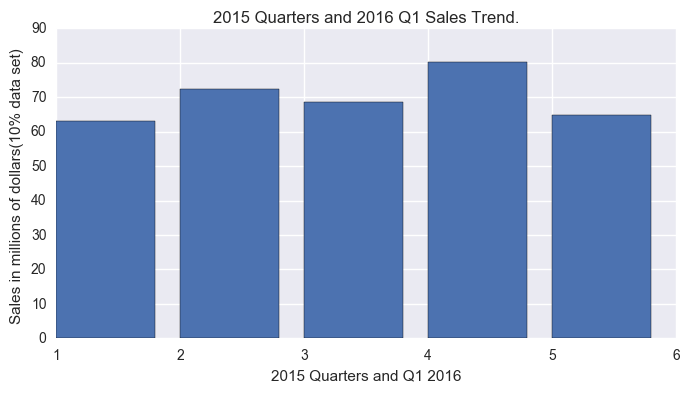

In [720]:
# plot 2015 and first quarter 2016.  

plt.bar(Q1234,quarterlist2015)
plt.xlabel("2015 Quarters and Q1 2016")
plt.title("2015 Quarters and 2016 Q1 Sales Trend.")
plt.ylabel("Sales in millions of dollars(10% data set) ")
plt.savefig('quarterly sales 2015 with Q1 2016 (large data set.jpg')
plt.show()

In [725]:
X_Q1 = goodiowastores['Q1_2015']
X_Q1.shape



(1283,)